In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.shape

(150, 6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

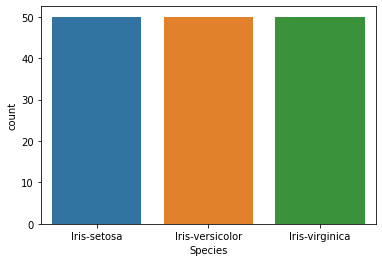

In [9]:
# Plotting
sns.countplot(data['Species'])

<AxesSubplot:>

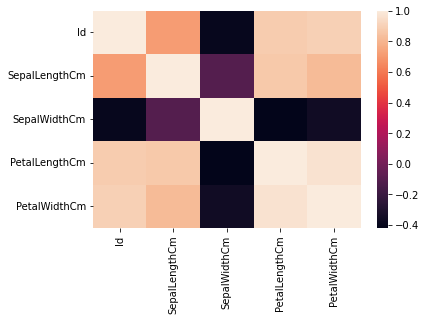

In [10]:
sns.heatmap(data.corr())

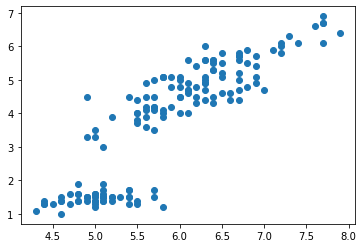

In [18]:
plt.scatter(data['SepalLengthCm'],data['PetalLengthCm'])

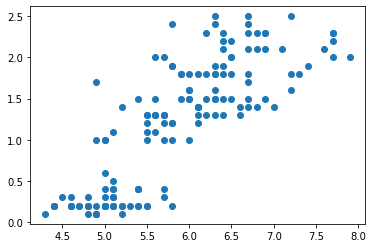

In [19]:
plt.scatter(data['SepalLengthCm'],data['PetalWidthCm'])

In [12]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Check for Null values 

In [11]:
data[data.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


#### Encoding the data 

In [21]:
encode=LabelEncoder()

In [22]:
data['Species']=encode.fit_transform(data['Species'])

#### Splitting X and y  

In [26]:
X=data.drop(['Species'],axis=1)
y=data['Species']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=110)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 5)
(45, 5)
(105,)
(45,)


#### KNN 

In [29]:
knn=KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.score(x_test,y_test)

0.9555555555555556

In [33]:
y_pred=knn.predict(x_test)

In [32]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [34]:
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 21  2]
 [ 0  0 10]]


In [36]:
print(recall_score(y_test,y_pred,average='macro'))

0.9710144927536232


In [38]:
print(precision_score(y_test,y_pred,average='macro'))

0.9444444444444445


In [39]:
print(accuracy_score(y_test,y_pred))

0.9555555555555556


#### Finding best value of K  

In [42]:
k_range=range(1,20)
scores={}
scores_list=[]
for k in k_range:
    k=KNeighborsClassifier(n_neighbors=k)
    k.fit(x_train,y_train)
    k_pred=k.predict(x_test)
#     score[k]=accuracy_score(y_test,k_pred)
    scores_list.append(accuracy_score(y_test,k_pred))
    

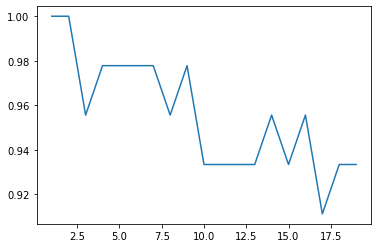

In [44]:
plt.plot(k_range,scores_list)